# Internship Test 2
## ML project

### Importing necessery libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data
df = pd.read_csv("C:/Users/LENOVO X1 YOGA/Downloads/dataframe_.csv")

In [3]:
df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [5]:
# checking the shape of data
df.shape

(1697, 2)

In [6]:
# checking for null values
df.isnull().sum()

input     1
output    1
dtype: int64

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
input,1696.0,1.159933,79.005970,-134.962839,-63.386506,10.195194,70.264109,134.605775
output,1696.0,-34.088017,65.771112,-132.422167,-80.026767,-50.470981,-11.000000,134.425495


### Data Preprocessing and Analysis

In [8]:
# as there are just two null values we can drop them
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

input     0
output    0
dtype: int64

In [10]:
# check for duplicate values
df.duplicated().sum()

606

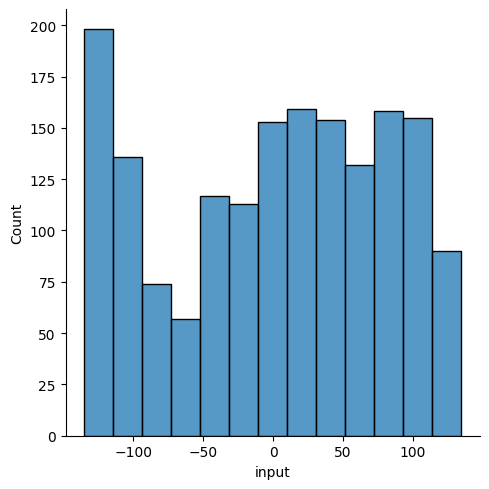

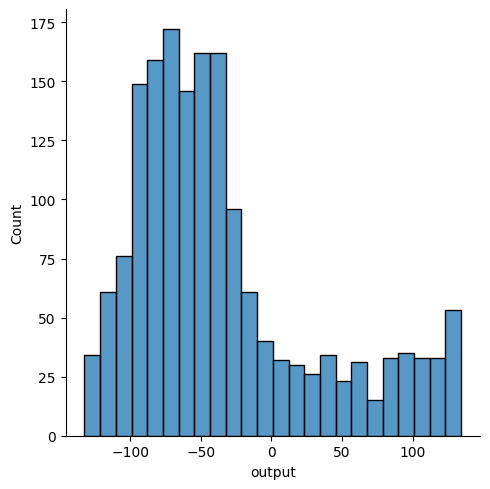

In [11]:
for i in df.columns:
    sns.displot(x = df[i])
    plt.show()

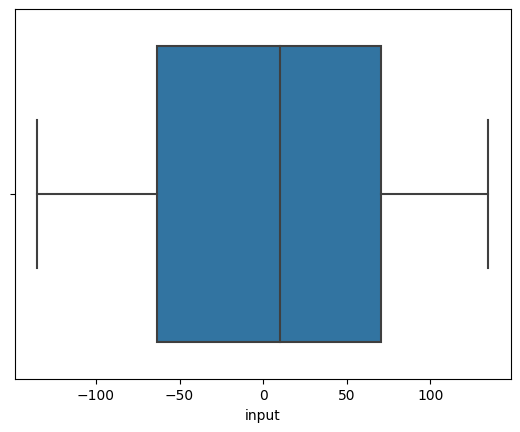

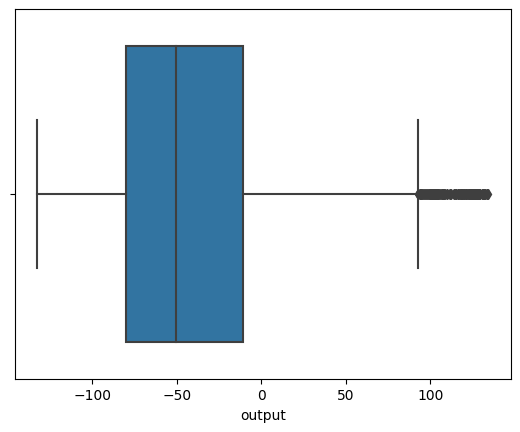

In [12]:
for i in df.columns:
    sns.boxplot(x = df[i])
    plt.show()

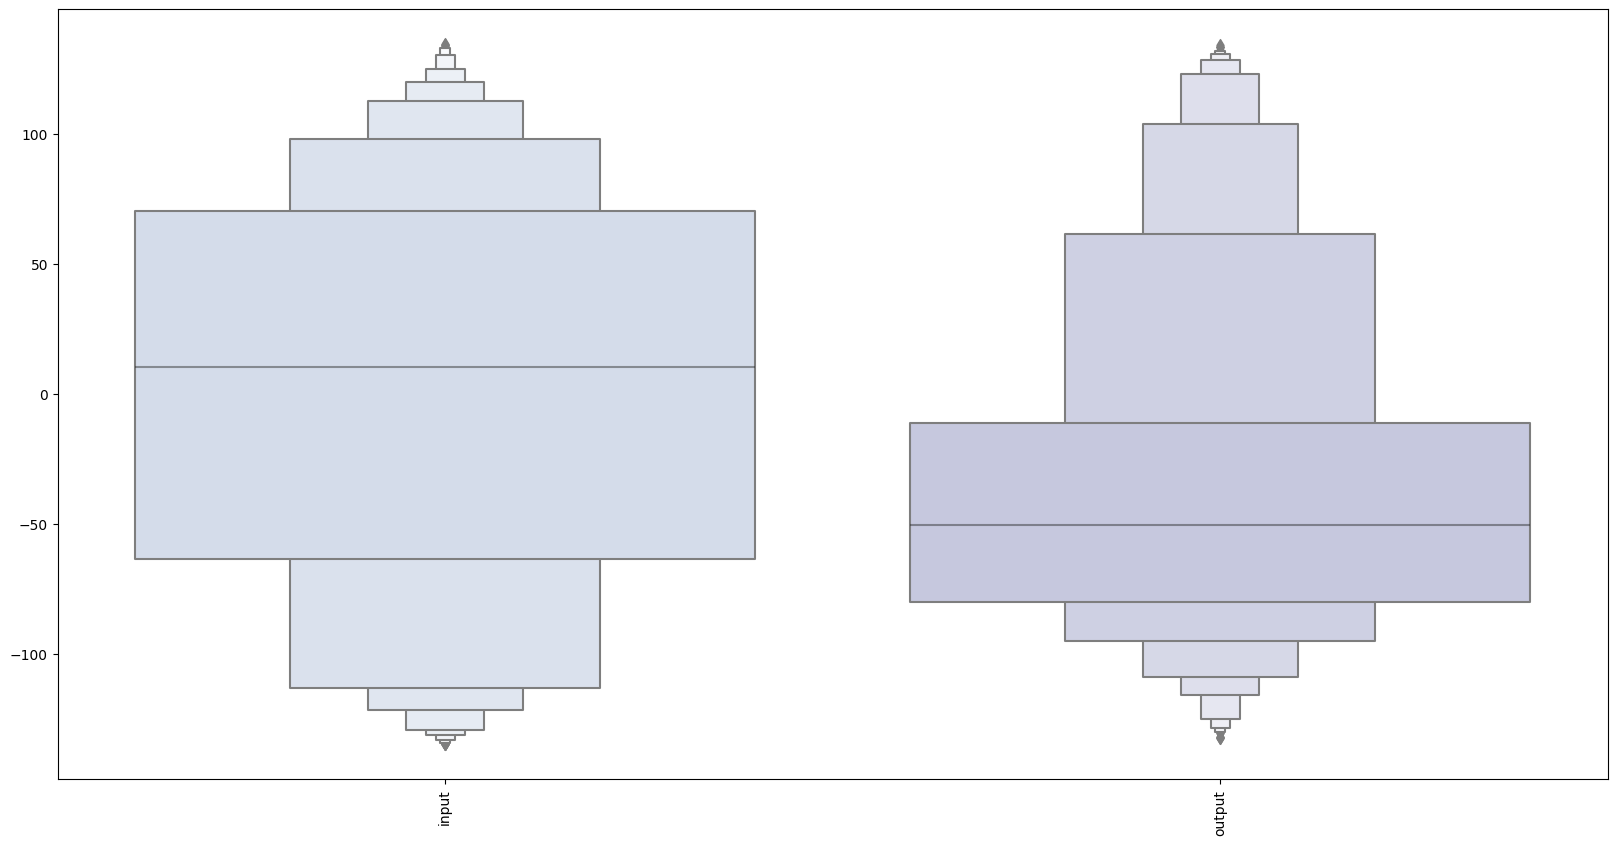

In [13]:
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = df,palette = colours)
plt.xticks(rotation=90)
plt.show()

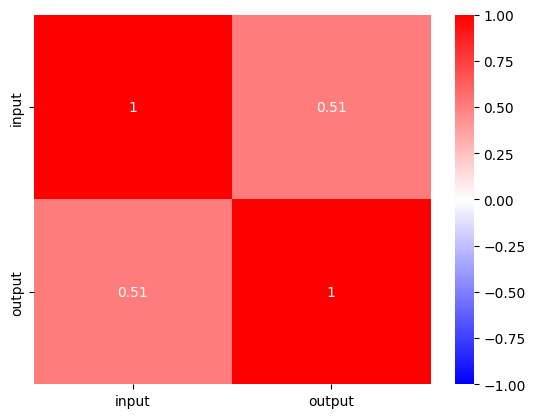

In [14]:
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='bwr')
plt.show()

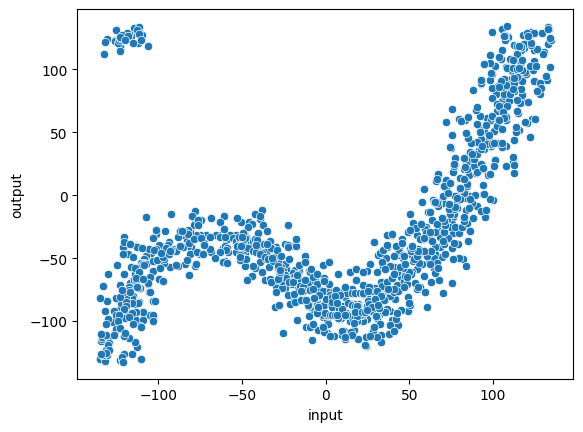

In [15]:
sns.scatterplot(data=df,x='input',y='output')
plt.show()

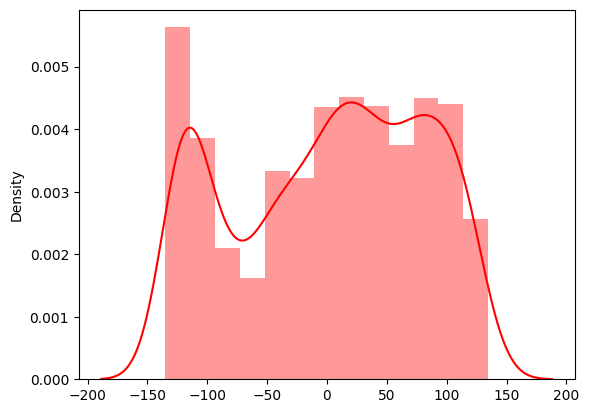

In [16]:
sns.distplot(x = df['input'],kde=True,color='red')
plt.show()

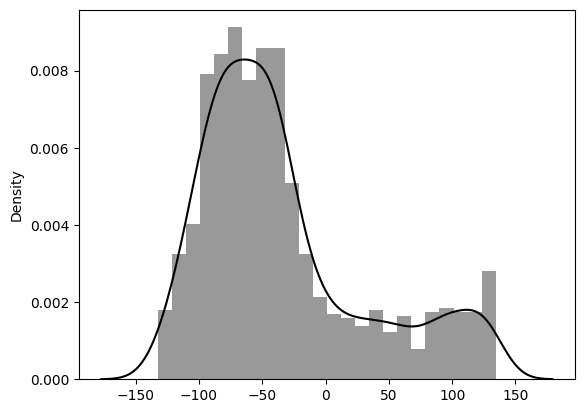

In [17]:
sns.distplot(x = df['output'],color = 'black')
plt.show()

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(1090, 2)

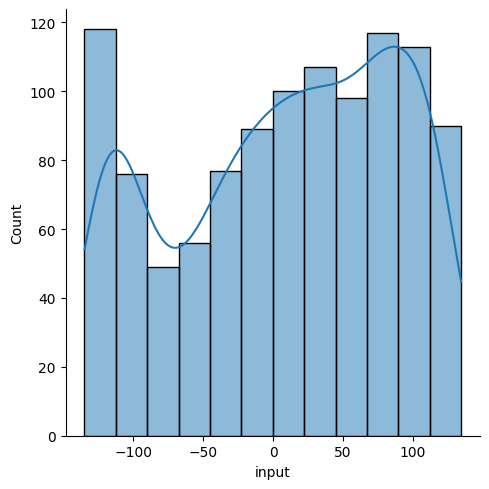

In [20]:
sns.displot(data=df['input'],kde=True)
plt.show()

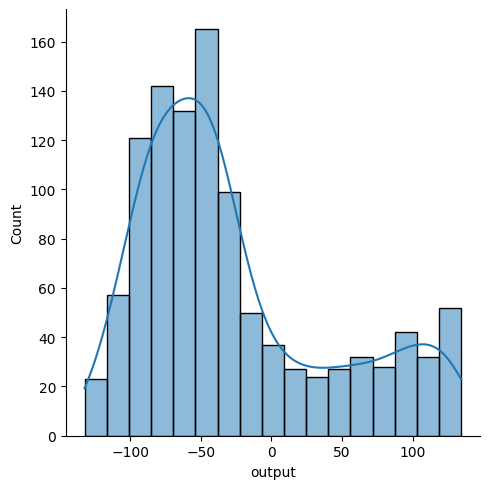

In [21]:
sns.displot(data=df['output'],kde=True)
plt.show()

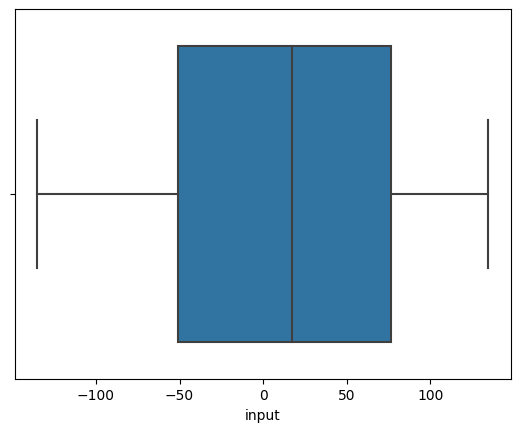

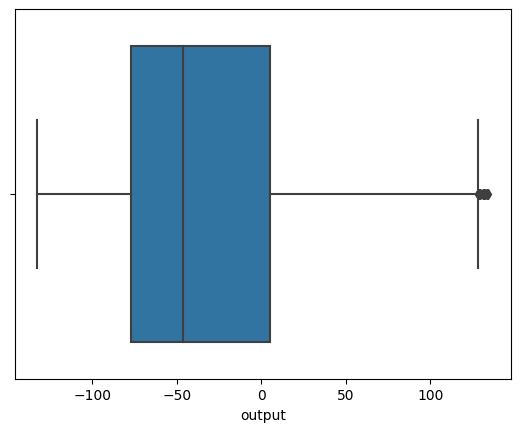

In [22]:
for i in df.columns:
    sns.boxplot(x = df[i])
    plt.show()

In [23]:
median=df.loc[df['output']<100,'output'].median()

In [24]:
median

-51.0

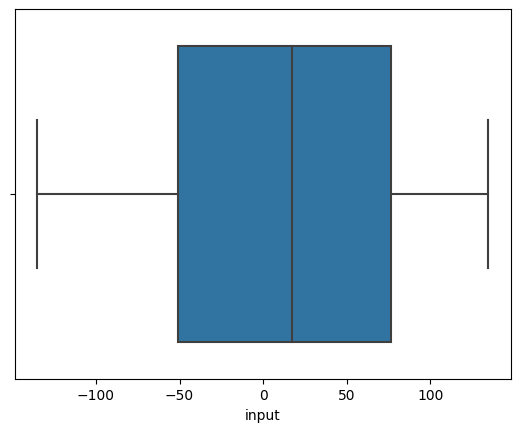

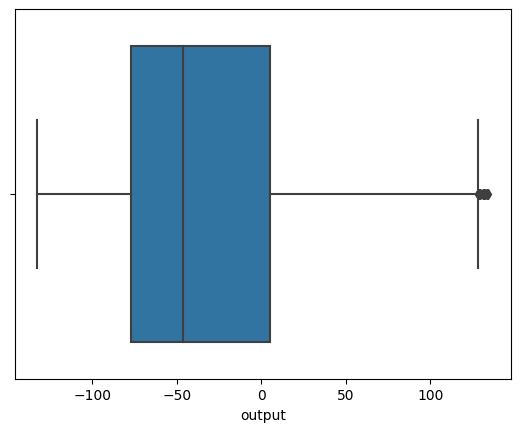

In [25]:
for i in df.columns:
    sns.boxplot(x = df[i])
    plt.show()

### conclusion

##### As we can see after removing duplicates from data still we have some outliers in ouput.we will apply standard scalar for scaling the data as it is robust to outliers.

###  Standard Scalar

In [26]:
# import standard scalar
from sklearn.preprocessing import StandardScaler

In [27]:
x = df['input']

In [28]:
y = df['output']

In [29]:
x.shape

(1090,)

In [30]:
y.shape

(1090,)

In [31]:
df_scaled = StandardScaler().fit_transform(df.to_numpy())

In [32]:
df_scaled = pd.DataFrame(df_scaled, columns=['input','output'])

In [33]:
df_scaled

,input,output
0,-1.662032,-1.509916
1,-1.646673,-1.500651
2,-1.816685,-1.503620
3,-1.634919,-1.439516
4,-1.752897,-1.249648
...,...,...
1085,-1.525848,2.172650
1086,-1.626641,2.209417
1087,-1.499476,2.261923
1088,-1.519458,2.276168


### Model Building

In [34]:
from sklearn.model_selection import train_test_split  

In [44]:
x =np.array(df['input'])

In [45]:
y = np.array(df['output'])

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [47]:
x_train.shape

(817,)

In [48]:
x_test.shape

(273,)

In [49]:
y_train.shape,y_test.shape

((817,), (273,))

### Linear regression

In [50]:
from sklearn.linear_model import LinearRegression

In [53]:
lr = LinearRegression().fit(x_train.reshape(-1,1),y_train)

In [55]:
p = lr.predict(x_test.reshape(-1,1))

In [56]:
p

array([-74.15484429, -19.60855724, -80.30346914,   4.84708846,
       -63.27527414,   5.3431592 ,   1.1885919 , -37.0547263 ,
        -0.33040846, -14.59791135, -71.97935239, -10.07182421,
         2.69765634, -72.33138256, -13.63163138,   0.41639006,
         4.7051808 , -78.33622316, -40.35603578,   6.72441794,
        13.62374474, -33.99335041, -43.68488726, -23.55391158,
        -9.04957357, -15.77976799,  -0.57866894, -37.02996187,
       -56.05108549,   2.85076796, -71.6679229 , -64.95380389,
       -42.88922705,  12.86931678, -14.20843282,   4.90417318,
       -38.93659274, -10.8212194 , -51.08119731,  -0.55525264,
         8.0622403 ,  -7.65780256, -54.04336051, -25.92798717,
       -80.03969532,  13.48279809, -62.85000845, -16.34286383,
       -56.1415227 , -45.62835012,  -7.81440784, -38.44042698,
       -41.45785232, -71.38552089,  16.24710206, -45.83797683,
         0.76730801, -22.15129523,  11.02187059, -81.31946897,
        10.59493638, -55.85782556,   4.08512709, -67.94

In [63]:
from sklearn.metrics import r2_score,accuracy_score

In [62]:
print(r2_score(p,y_test))

-1.7169009967311126


### XGB Regressor

In [65]:
from xgboost import XGBRegressor

In [67]:
xg = XGBRegressor().fit(x_train.reshape(-1,1),y_train)

In [68]:
p = xg.predict(x_test)

In [69]:
print(r2_score(p,y_test))

0.5612314380216956


### Decision tree Regressor

In [70]:
from sklearn.tree import DecisionTreeRegressor 

In [72]:
dt = DecisionTreeRegressor().fit(x_train.reshape(-1,1),y_train)

In [74]:
p = dt.predict(x_test.reshape(-1,1))

In [75]:
print(r2_score(p,y_test))

0.4959641771443426


### RandomForest Regressor

In [77]:
from sklearn.ensemble import RandomForestRegressor
  

In [78]:
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [80]:
rf = rfr.fit(x_train.reshape(-1,1),y_train)

In [83]:
p = rf.predict(x_test.reshape(-1,1))

In [84]:
print(r2_score(p,y_test))

0.5870207820474147


### Support Vector Regressor

In [85]:
from sklearn.svm import SVR

In [87]:
sv = SVR().fit(x_train.reshape(-1,1),y_train)

In [89]:
p = sv.predict(x_test.reshape(-1,1))

In [90]:
print(r2_score(p,y_test))

0.18060931351126253


### hyperPrameter tuning

In [91]:
from sklearn.model_selection import GridSearchCV

In [94]:
rrf= RandomForestRegressor()

In [100]:
from sklearn.model_selection import RandomizedSearchCV as rcv

In [101]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


### Cross validation

In [104]:
from sklearn.model_selection import StratifiedKFold 

In [105]:
from sklearn.model_selection import cross_val_score